In [55]:
!git clone https://github.com/DanielHevdeli/hafifot-tiug.git

fatal: destination path 'hafifot-tiug' already exists and is not an empty directory.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, AutoTokenizer

In [57]:
df = pd.read_csv('hafifot-tiug/posts.csv')
df.head()

,question_id,length,text
0,200001,1624,"אז כן יש לי שני מצבים, כשאני בבית עם המשפחה של..."
1,200002,839,התגייסתי לפני חודשיים היה קשה נכון טירונות זה ...
2,200005,825,"שלום רב, \nלאשתי ולי יש כלבת שיצו מקסימה בת 8 ..."
3,200007,3348,"הייתי בזוגיות שנמשכה כמעט חצי שנה,הכרנו דרך הה..."
4,200008,922,"היי שלום קצת רקע עלינו קודם, אני בן 21 היא בת ..."


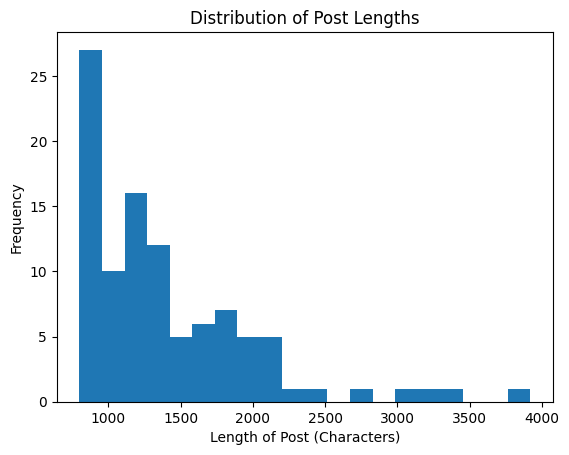

In [58]:
plt.hist(df['length'], bins=20)
plt.xlabel('Length of Post (Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Post Lengths')
plt.show()

We can see that the majority of the posts are 800-2200 in length

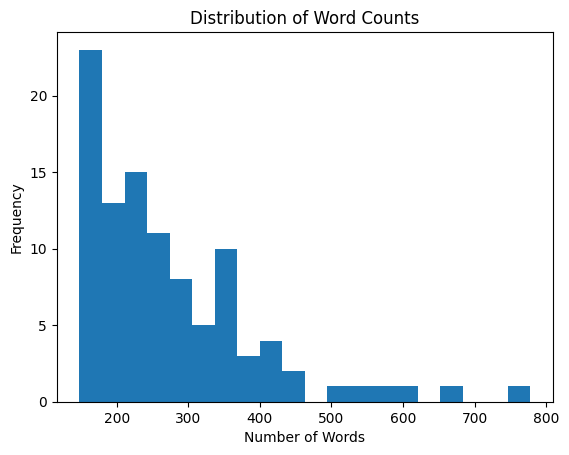

In [59]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.hist(df['word_count'], bins=20)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()

We can see that the distributions of chars and words among each one's scale are very similar (historgrams shape are very similar). Here, most of the posts contain 100-450 words

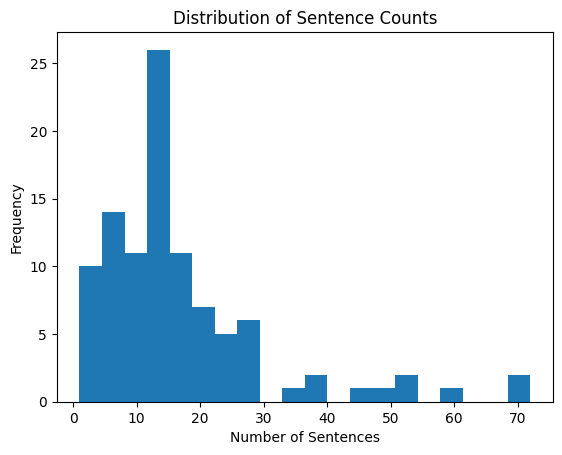

In [60]:
df['sentence_count'] = df['text'].apply(lambda x: len(str(x).split('.')))

plt.hist(df['sentence_count'], bins=20)
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Counts')
plt.show()

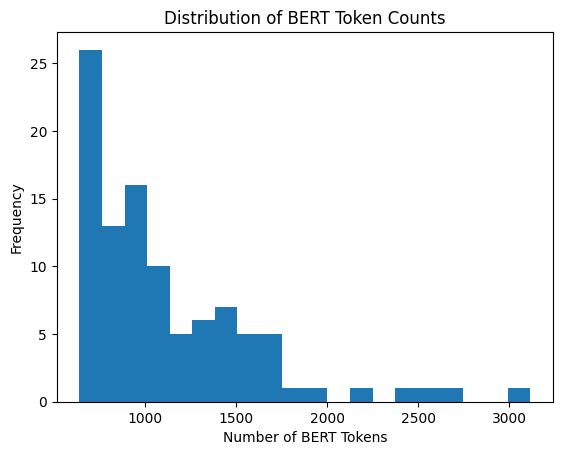

In [61]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def count_bert_tokens(text):
    if pd.isna(text):
        return 0
    tokens = tokenizer.tokenize(str(text))
    return len(tokens)

df['bert_token_count'] = df['text'].apply(count_bert_tokens)

plt.hist(df['bert_token_count'], bins=20)
plt.xlabel('Number of BERT Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of BERT Token Counts')
plt.show()

The distribution is almost identical to the char-level distribution, what implies that maybe the tokenizer didnt trained on a lot of hebrew text, what makes him a char-level tokenizer for hebrew. Lets check it!

In [62]:
arb_text = df['text'][0]
print("--------- Text ---------")
print(arb_text)
print("--------- Tokens ---------")
print(tokenizer.tokenize(arb_text))

--------- Text ---------
אז כן יש לי שני מצבים, כשאני בבית עם המשפחה שלי אני פחות בסטלה מהחיים ואני הילדה הגאונה שתמיד הייתי, וכשאני עם חברים וצוחקת מהכל וכמעט תמיד בסטלה מהחיים וממש קשה לתפוס אותי רצינית במצבים שקורים בחוץ.  
כשהייתי קטנה יותר הייתי הילדה הכי מצטיינת בשכבה אבל בשנתיים שלוש האחרונות הפסקתי ללמוד והוצאתי מלא נכשלים ועכשיו אני בכיתה י מבר, וכשאני עם חברים אני תמיד אוהבת לשים את הבעיות בצד ולהתעלם מרוב הדברים שקורים כי אני רק רוצה פשוט להנות ולצחוק. 
אם יש מבחנים או אירועים אני כמעט תמיד שוכחת מהם וחברות שלי חושבות שאני סתומה בגלל זה. מה שהן לא מבינות זה שלא אכפת לי מתי יש מבחן כי אני יודעת שתוך שנייה של הכנה למבחן אני מוציאה מעל 90. הסיבה היחידה שהלכתי למבר זה בגלל שאני צריכה פחות לחץ ובגלל שהממוצע שלי בסוף כיתה ט התאים רק לכיתת מבר. 
חברים אחרים שלי מהשכבה צוחקים עליי שאני במבר, וזה גם לא מעניין אותי ממש כי זה היה צפוי. 
כל הזמן כשיש מצבים שצריך להילחץ וכולם לחוצים ושמים לב שאני לא לחוצה, גם חושבים שאני סתומה ואטומה. אני פשוט לא רואה סיבה להילחץ, בעיקר בגלל שאם נלחצים א

We were right! So lets use a hebrew tokenizer

Token indices sequence length is longer than the specified maximum sequence length for this model (789 > 512). Running this sequence through the model will result in indexing errors


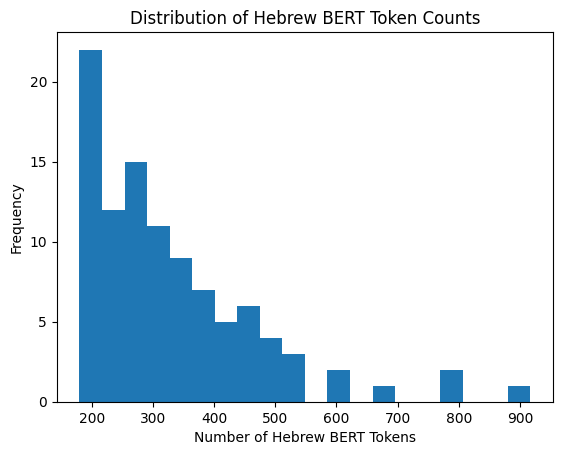

In [63]:
hebrew_tokenizer = AutoTokenizer.from_pretrained('onlplab/alephbert-base')

def count_hebrew_bert_tokens(text):
    if pd.isna(text):
        return 0
    return len(hebrew_tokenizer.encode(str(text), add_special_tokens=True))

df['hebrew_bert_token_count'] = df['text'].apply(count_hebrew_bert_tokens)

plt.hist(df['hebrew_bert_token_count'], bins=20)
plt.xlabel('Number of Hebrew BERT Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Hebrew BERT Token Counts')
plt.show()

This is much better and actually very similar to the words distribution. Lets check a few posts

In [64]:
def print_post_info(post_num):
    print('--------- Text ---------')
    print(df['text'][post_num])
    print('--------- Tokens (AlephBERT) ---------')
    print(hebrew_tokenizer.tokenize(df['text'][post_num]))
    print('--------------------------------------')
    print(f'Num of words: {df['word_count'][post_num]}')
    print(f'Num of AlephBERT tokens: {df['hebrew_bert_token_count'][post_num]}')

In [65]:
print_post_info(0)

--------- Text ---------
אז כן יש לי שני מצבים, כשאני בבית עם המשפחה שלי אני פחות בסטלה מהחיים ואני הילדה הגאונה שתמיד הייתי, וכשאני עם חברים וצוחקת מהכל וכמעט תמיד בסטלה מהחיים וממש קשה לתפוס אותי רצינית במצבים שקורים בחוץ.  
כשהייתי קטנה יותר הייתי הילדה הכי מצטיינת בשכבה אבל בשנתיים שלוש האחרונות הפסקתי ללמוד והוצאתי מלא נכשלים ועכשיו אני בכיתה י מבר, וכשאני עם חברים אני תמיד אוהבת לשים את הבעיות בצד ולהתעלם מרוב הדברים שקורים כי אני רק רוצה פשוט להנות ולצחוק. 
אם יש מבחנים או אירועים אני כמעט תמיד שוכחת מהם וחברות שלי חושבות שאני סתומה בגלל זה. מה שהן לא מבינות זה שלא אכפת לי מתי יש מבחן כי אני יודעת שתוך שנייה של הכנה למבחן אני מוציאה מעל 90. הסיבה היחידה שהלכתי למבר זה בגלל שאני צריכה פחות לחץ ובגלל שהממוצע שלי בסוף כיתה ט התאים רק לכיתת מבר. 
חברים אחרים שלי מהשכבה צוחקים עליי שאני במבר, וזה גם לא מעניין אותי ממש כי זה היה צפוי. 
כל הזמן כשיש מצבים שצריך להילחץ וכולם לחוצים ושמים לב שאני לא לחוצה, גם חושבים שאני סתומה ואטומה. אני פשוט לא רואה סיבה להילחץ, בעיקר בגלל שאם נלחצים א

In [66]:
print_post_info(10)

--------- Text ---------
היי, אני בת 17 והייתי בצו ראשון, בבדיקה הרפואית (איפה שקובעים פרופיל) היא שאלה אותי אם הייתי אצל פסיכולוג ואמרתי לה שכן והיא שאלה למה אז אמרתי לה כי היו לי הפרעות אכילה והיא שאלה מאיזה סוג, ופשוט לא הייתי אוכלת בגיל 12 (עקב איזשהי הטרדה מינית קשה שחוויתי והשפיעה עליי לרעה), והייתי הולכת לכל מיני פסיכולוגים וגם לתל השומר ולתזונאיות והייתי ממש שונאת את זה. היא שאלה אותי אם עדיין יש לי את זה ואמרתי לה שלא כי למדתי איך להיות רזה ובריאה בדרכים אחרות כמו לעשות ספורט ולאכול בריא (שזה באמת נכון) אבל בתוך תוכי אני יודעת ומרגישה שעדיין יש לי הפרעה כלשהי, אני רואה את עצמי יותר שמנה ממה שאני באמת,כולם אומרים לי שאני רזה ואני מרגישה ורואה את עצמי שמנה, אבל אני מודעת לזה שאני רואה משהו שגוי. (עדיין זה קשה לי, כי זה כמו שיגידו לכם שמים הם בצבע סגול למרות שאתם רואים שהם שקופים) ההבדל בין אז להיום הוא שעדיין יש לי את המחלה רק שאני מתמודדת איתה בצורה אחרת. 
בקיצור, היא אמרה שהצבא שולח לקב״ן מי שהיה לו איזשהי הפרעת אכילה. (נראה לי שבמקרה שלי זה אנורקסיה, הייתי בתת משקל רציני באות

In [68]:
df[['length', 'word_count', 'sentence_count', 'bert_token_count', 'hebrew_bert_token_count']].describe()

,length,word_count,sentence_count,bert_token_count,hebrew_bert_token_count
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1400.350000,272.320000,17.030000,1115.730000,333.450000
std,606.122473,119.025664,13.826088,482.583784,142.458172
min,800.000000,148.000000,1.000000,638.000000,180.000000
25%,936.250000,182.250000,9.000000,743.500000,232.500000
50%,1215.500000,238.000000,13.000000,970.500000,292.000000
75%,1697.250000,334.000000,20.250000,1345.750000,394.250000
max,3921.000000,778.000000,72.000000,3115.000000,917.000000
